In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import h5py
import pickle
import os
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator



In [129]:
dataset='EY'
sub='sub-20190929-06'
ses=sub.split('-')[1]
worm=f'{sub}_ses-{ses}'

if dataset=='EY':
    h5_path = f"EY_Out/{worm}_ophys.h5"
    np_path = f'EY_Out/{worm}_ophys_stardist.npy'
    seg=np.load(np_path)
    ultrack_path = f"EY_Out/pred_track/EY_{worm}_ophys.npy"
    ban_path=f"tracking_out/{sub}_reordered_seg20_centroids.npy"
    x_res = 0.27
    y_res = 0.27
    z_res = 1.5

h5 = h5py.File(h5_path,'r')
c_seg =  np.array(h5["calcium_segmentation"])
c_img = np.array(h5["calcium_image"])
x = np.load(ultrack_path)
ban=np.load(ban_path)


# Data slices over time

/var/folders/4q/96c17h2j6fl0r2jjy2c7cn9h0000gn/T/ipykernel_48006/55234282.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(seg_data[time_point,i,1], seg_data[time_point,i,0], c=colors[i], alpha=0.2)


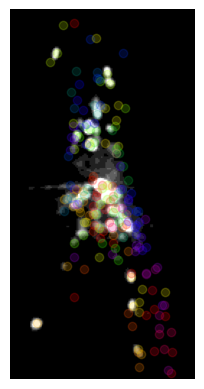

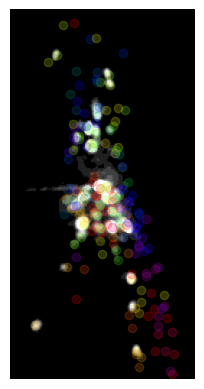

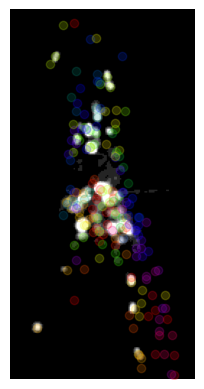

In [131]:
def overlay_segmentation_on_frame(frame_data, seg_data, time_point):
    
    plt.imshow(frame_data, cmap='gray')
    t,N,_ = seg_data.shape
    cmap = mpl.colormaps['prism']
    # Take colors at regular intervals spanning the colormap.
    colors = cmap(np.linspace(0, 1, len(seg_data)))

    # Scatter the selected x and y coordinates with colors mapped to their normalized indices
    for i in np.arange(N):
        plt.scatter(seg_data[time_point,i,1], seg_data[time_point,i,0], c=colors[i], alpha=0.2)
    plt.axis('off')
    plt.savefig(f"data_proposal/{dataset}/img_seg_{time_point}.png")
    plt.show()

for time_point in [4,49,99]:
    z_dim = 5 # slice number
    # time_point = 5
    time_frame = c_img[time_point, :, :, z_dim]
    overlay_segmentation_on_frame(time_frame, c_seg, time_point)

# Tracking performance in 2D images

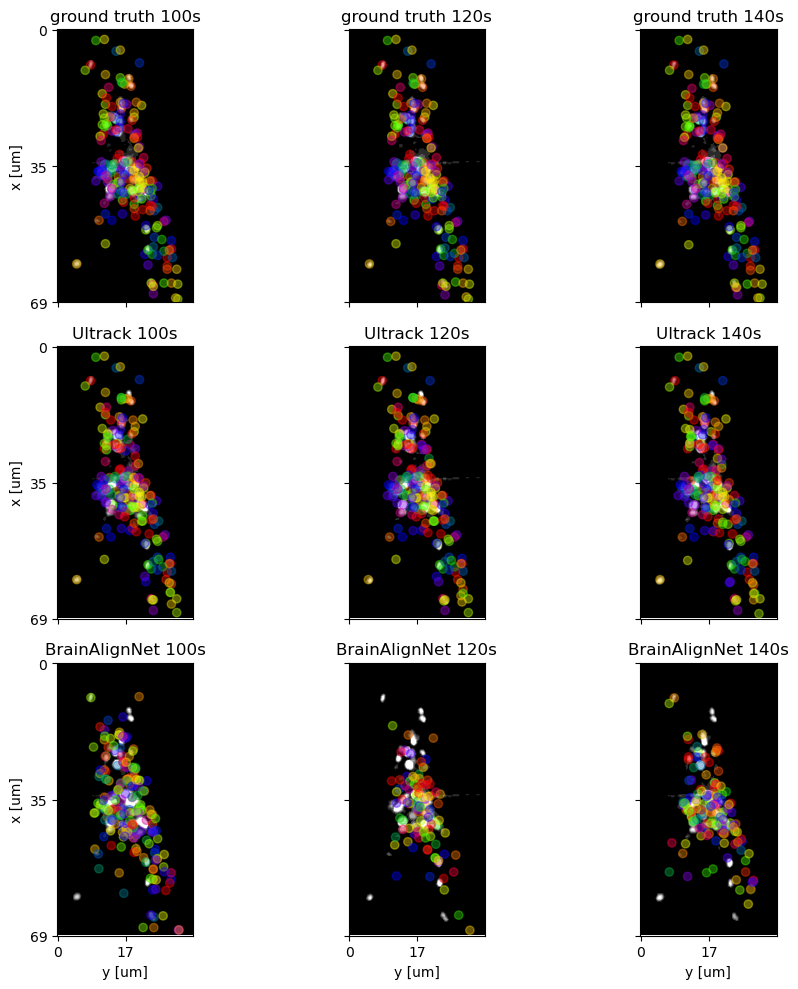

In [104]:
fig, axs = plt.subplots(3,3, figsize=(10,10), sharey=True, sharex=True)

z=5
t_,x_,y_,z_ = c_img.shape
n,m,_ =c_seg.shape
cmap = mpl.colormaps['prism']
# Take colors at regular intervals spanning the colormap.
colors1 = cmap(np.linspace(0, 1, m))
n2,m2,_ =ban.shape
colors2 = cmap(np.linspace(0, 1, m2))
for j,t in enumerate([100,120,140]):
    axs[0,j].imshow(c_img[t,:,:,z], cmap='gray')
    axs[1,j].imshow(c_img[t,:,:,z], cmap='gray')
    axs[2,j].imshow(c_img[t,:,:,z], cmap='gray')
    axs[0,j].set_title(f'ground truth {t}s')
    axs[1,j].set_title(f'Ultrack {t}s')
    axs[2,j].set_title(f'BrainAlignNet {t}s')
    axs[2,j].set_xlabel('y [um]')
    axs[2,j].set_xticks(np.linspace(0,y_,3), labels=np.round(np.linspace(0,y_,3)*x_res).astype(int))
    #axs[0,j].axis('off')
    #axs[1,j].axis('off')
    axs[0,j].scatter(c_seg[t,:,1],c_seg[t,:,0],alpha=0.4,color=colors1)
    axs[1,j].scatter(x[t,:,1],x[t,:,0],alpha=0.4,color=colors1)
    axs[2,j].scatter(ban[t,:,1],ban[t,:,0],alpha=0.4,color=colors2)


axs[0,0].set_ylabel('x [um]')
axs[1,0].set_ylabel('x [um]')
axs[2,0].set_ylabel('x [um]')
axs[0,0].set_yticks(np.linspace(0,x_,3), labels=np.round(np.linspace(0,x_,3)*x_res).astype(int))
axs[1,0].set_yticks(np.linspace(0,x_,3), labels=np.round(np.linspace(0,x_,3)*x_res).astype(int))
axs[2,0].set_yticks(np.linspace(0,x_,3), labels=np.round(np.linspace(0,x_,3)*x_res).astype(int))
plt.tight_layout()


# Tracking performance in 3D over time

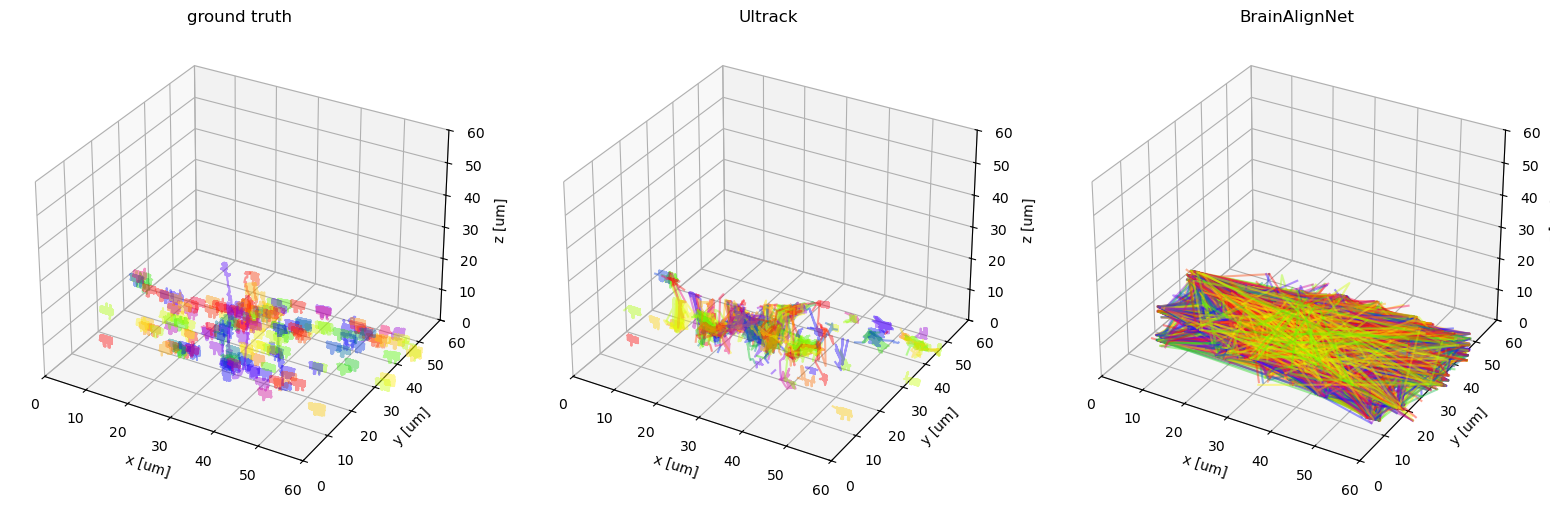

In [127]:
fig = plt.figure(figsize=(16,5))
names=['ground truth', 'Ultrack', 'BrainAlignNet']

for i,x_new in enumerate([c_seg,x,ban]):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    n,m,_ =x_new.shape
    cmap = mpl.colormaps['prism']
    colors = cmap(np.linspace(0, 1, m))

    for j in np.arange(m):
        ax.plot(x_new[:,j,0]*x_res, x_new[:,j,1]*y_res,x_new[:,j,2]*z_res,color=colors[j], alpha=0.4)
    ax.set_xlim(0,60)
    ax.set_ylim(0,60)
    ax.set_zlim(0,60)
    ax.set_xlabel('x [um]')
    ax.set_ylabel('y [um]')
    ax.set_zlabel('z [um]')
    ax.set_title(names[i])

plt.tight_layout()
plt.show()

# Segmentation Output

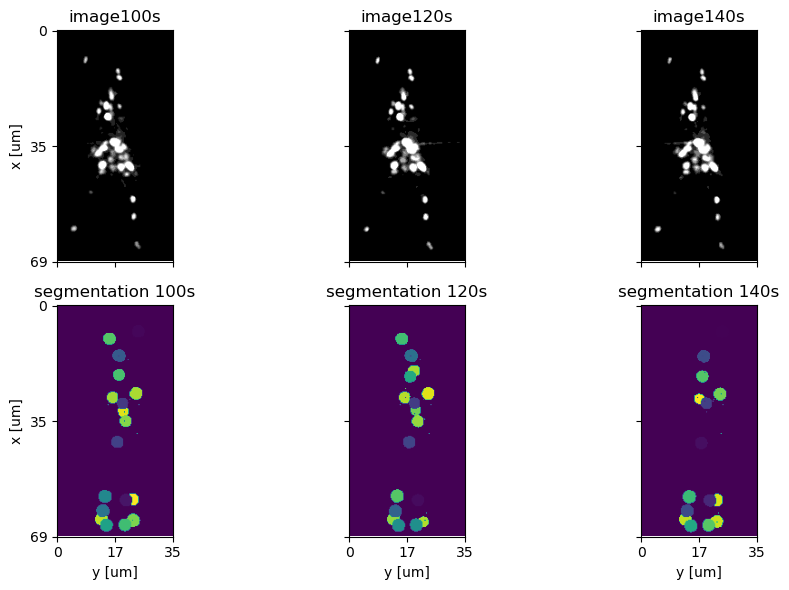

In [110]:
fig, axs = plt.subplots(2,3, figsize=(10,6), sharey=True, sharex=True)

np_path = 'EY_Out/sub-20190924-03_ses-20190924_ophys_stardist.npy'
seg=np.load(np_path)

z=5
x = np.load(np_path)
t_,x_,y_,z_ = c_img.shape

#cmap = mpl.colormaps['gist_rainbow']
cmap = mpl.colormaps['prism']
# Take colors at regular intervals spanning the colormap.

for j,t in enumerate([100,120,140]):
    axs[0,j].imshow(c_img[t,:,:,z], cmap='gray')
    axs[1,j].imshow(seg[t,z,:,:].T, )
    axs[0,j].set_title(f'image{t}s')
    axs[1,j].set_title(f'segmentation {t}s')


axs[1,0].set_ylabel('x [um]')
axs[0,0].set_ylabel('x [um]')
axs[1,0].set_yticks(np.linspace(0,x_,3), labels=np.round(np.linspace(0,x_,3)*x_res).astype(int))
axs[0,0].set_yticks(np.linspace(0,x_,3), labels=np.round(np.linspace(0,x_,3)*x_res).astype(int))

axs[1,0].set_xlabel('y [um]')
axs[1,1].set_xlabel('y [um]')
axs[1,2].set_xlabel('y [um]')
axs[1,0].set_xticks(np.linspace(0,y_,3), labels=np.round(np.linspace(0,y_,3)*x_res).astype(int))
axs[1,1].set_xticks(np.linspace(0,y_,3), labels=np.round(np.linspace(0,y_,3)*x_res).astype(int))
axs[1,2].set_xticks(np.linspace(0,y_,3), labels=np.round(np.linspace(0,y_,3)*x_res).astype(int))
plt.tight_layout()



# BrainAlignNet inputs and output

In [ ]:
def overlay_segmentation_on_frame2(frame_data, seg_data,reg_problem, mode,ax):
    x_,y_, = frame_data.shape
    ax.imshow(frame_data, cmap='gray')
    N,_ = seg_data.shape
    cmap = mpl.colormaps['prism']
    colors = cmap(np.linspace(0, 1, len(seg_data)))
    for i in np.arange(N):
        ax.scatter(seg_data[i,1], seg_data[i,0], c=colors[i], alpha=0.2)
    #plt.axis('off')
    #plt.ylabel('x [um]')
    ax.set_yticks(np.linspace(0,x_,3), labels=[None,None,None])#labels=np.round(np.linspace(0,x_,3)*x_res).astype(int))
    #plt.xlabel('y [um]')
    ax.set_xticks(np.linspace(0,y_,3),labels=[None,None,None])#, labels=np.round(np.linspace(0,y_,3)*x_res).astype(int))

/var/folders/4q/96c17h2j6fl0r2jjy2c7cn9h0000gn/T/ipykernel_48006/3779150979.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(seg_data[i,1], seg_data[i,0], c=colors[i], alpha=0.2)
/var/folders/4q/96c17h2j6fl0r2jjy2c7cn9h0000gn/T/ipykernel_48006/3779150979.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(seg_data[i,1], seg_data[i,0], c=colors[i], alpha=0.2)
/var/folders/4q/96c17h2j6fl0r2jjy2c7cn9h00

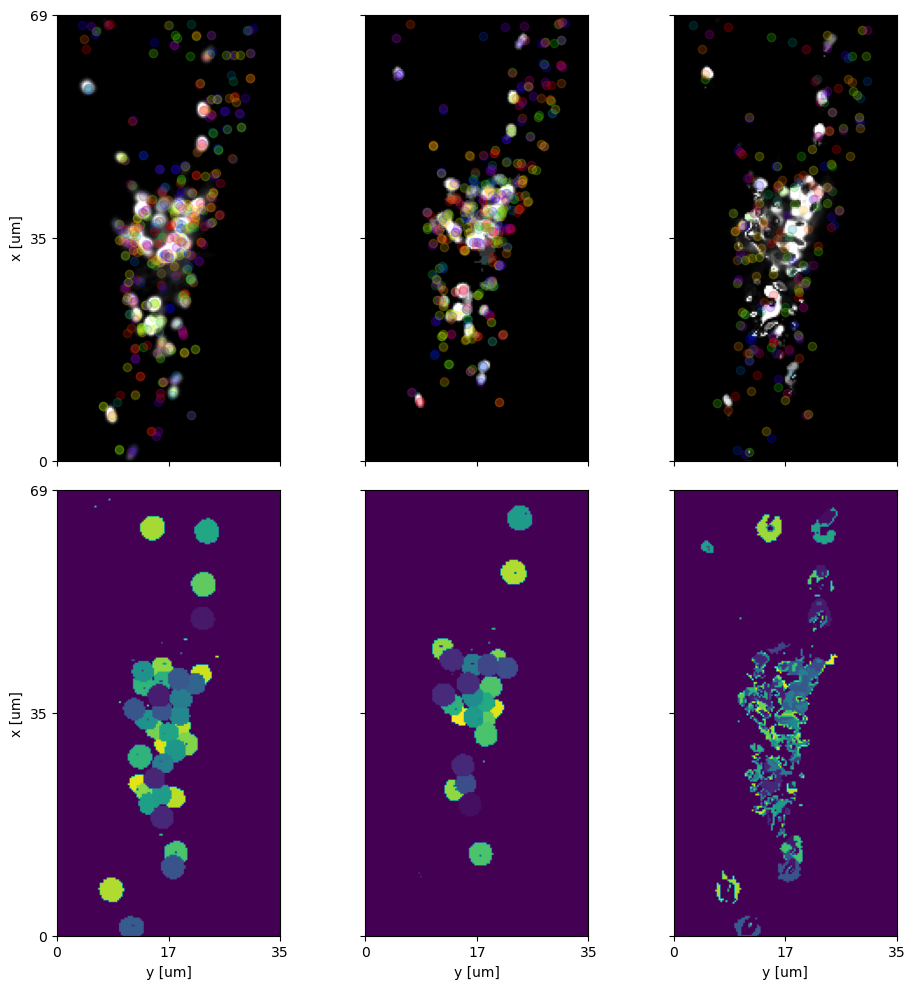

In [134]:
modes=['moving','fixed','warped_moving']
z_dim = 5

fig, axs = plt.subplots(2,3, figsize=(10,10), sharey=True, sharex=True)

z=5
t_,x_,y_,z_ = c_img.shape
n,m,_ =c_seg.shape
cmap = mpl.colormaps['prism']
# Take colors at regular intervals spanning the colormap.
colors1 = cmap(np.linspace(0, 1, m))
n2,m2,_ =ban.shape
colors2 = cmap(np.linspace(0, 1, m2))
for j,mode in enumerate(modes):

    if j<2:
        img = h5py.File(f"data/test/{sub}/{mode}_images.h5",'r')
        seg = h5py.File(f"data/test/{sub}/{mode}_labels.h5",'r')
        rois = h5py.File(f"data/test/{sub}/{mode}_rois.h5",'r')
        if i==0:
            reg_problem = list(rois.keys())[0]
            print(reg_problem)
        image_data=img[reg_problem]
        seg_data=seg[reg_problem]
        rois_data=rois[reg_problem]
    else:
        
        file_path=f'tracking_out/registered_outputs_{sub}.pkl'
        with open(file_path, 'rb') as f:
            loaded_data = pickle.load(f)

        seg_data=loaded_data[reg_problem]['warped_moving_centroids']
        image_data=loaded_data[reg_problem]['warped_moving_image']
        rois_data=loaded_data[reg_problem]['warped_moving_roi']

    time_frame = image_data[:, :, z_dim]
    overlay_segmentation_on_frame2(time_frame, seg_data, reg_problem, mode,axs[0,j])

    x_,y_, = time_frame.shape
    axs[1,j].imshow(rois_data[:,:,z_dim])

    axs[1,j].set_ylim(0,69)
    axs[1,j].set_xlim(left=0)

    axs[1,j].set_yticks(np.linspace(0,x_,3), labels=[None,None,None])#,labels=np.round(np.linspace(0,x_,3)*x_res).astype(int))
    axs[1,j].set_xlabel('y [um]')
    axs[1,j].set_xticks(np.linspace(0,y_,3), labels=np.round(np.linspace(0,y_,3)*x_res).astype(int))


axs[0,0].set_ylabel('x [um]')
axs[1,0].set_ylabel('x [um]')
axs[0,0].set_yticks(np.linspace(0,x_,3), labels=np.round(np.linspace(0,x_,3)*x_res).astype(int))
axs[1,0].set_yticks(np.linspace(0,x_,3), labels=np.round(np.linspace(0,x_,3)*x_res).astype(int))

plt.tight_layout()

In [135]:
reg_problem

'0to346'

# Plot tensorboard outputs

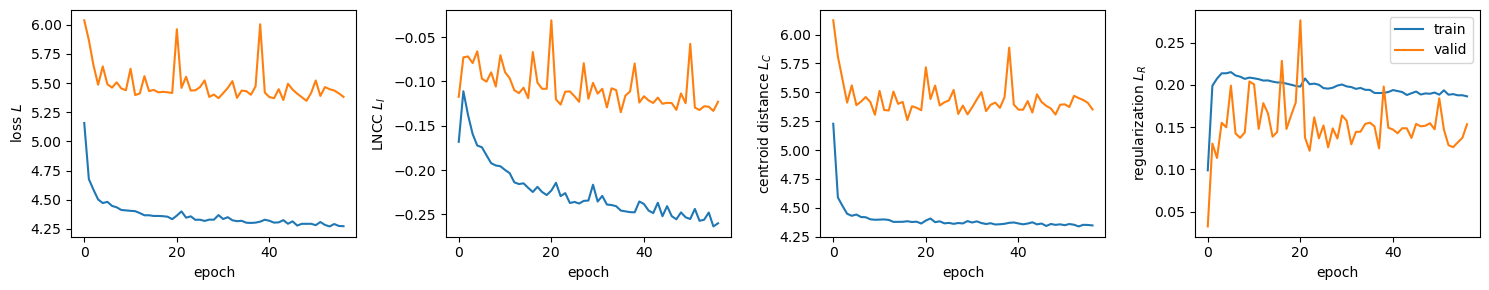

In [ ]:


ncc=['tb_out/run-exp_our_data3_test_EY_2w_train-tag-epoch_loss_image_LocalNormalizedCrossCorrelationLoss_weighted.csv','tb_out/run-exp_our_data3_test_EY_2w_validation-tag-epoch_loss_image_LocalNormalizedCrossCorrelationLoss_weighted.csv']
cent=['tb_out/run-exp_our_data3_test_EY_2w_train-tag-epoch_loss_label_CentroidDistance_weighted.csv','tb_out/run-exp_our_data3_test_EY_2w_validation-tag-epoch_loss_label_CentroidDistance_weighted.csv']
reg=['tb_out/run-exp_our_data3_test_EY_2w_train-tag-epoch_loss_regularization_HybridNorm_weighted.csv','tb_out/run-exp_our_data3_test_EY_2w_validation-tag-epoch_loss_regularization_HybridNorm_weighted.csv']
loss=['tb_out/run-exp_our_data3_test_EY_2w_train-tag-epoch_loss.csv','tb_out/run-exp_our_data3_test_EY_2w_validation-tag-epoch_loss.csv']

fig,axs=plt.subplots(1,4, figsize=(15,3),sharey=False)
names=[r'loss $L$',r'LNCC $L_I$', r'centroid distance $L_C$', r'regularization $L_R$']
for i,metric in enumerate([loss,ncc,cent,reg]):
    for j,mode in enumerate(['train', 'valid']):
        df = pd.read_csv(metric[j])
        
        x=np.array(df['Step'])
        y=np.array(df['Value'])

        if i==3:
            axs[i].plot(x,y, label=mode)
        else:
            axs[i].plot(x,y)

    axs[i].set_ylabel(names[i])
    axs[i].set_xlabel('epoch')
axs[3].legend()

plt.tight_layout()

/var/folders/4q/96c17h2j6fl0r2jjy2c7cn9h0000gn/T/ipykernel_50122/501766536.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right', handlelength=2, ncol=1, fontsize=10)


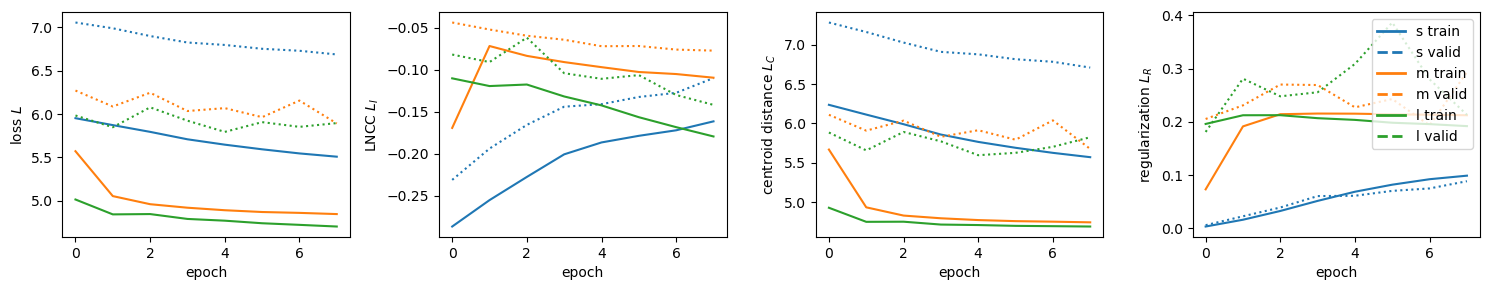

In [63]:
lrs=['_lrsmall','','_lrlarge_2']
colors=['tab:blue','tab:orange','tab:green']
metrics=['','_image_LocalNormalizedCrossCorrelationLoss_weighted','_label_CentroidDistance_weighted','_regularization_HybridNorm_weighted']
fig,axs=plt.subplots(1,4, figsize=(15,3),sharey=False)
names=[r'loss $L$',r'LNCC $L_I$', r'centroid distance $L_C$', r'regularization $L_R$']

for k ,name in enumerate(names):
    for i,lr in enumerate(lrs):
        for j,mode in enumerate(['train', 'validation']):
            df = pd.read_csv(f'tb_out/run-fold1{lr}_{mode}-tag-epoch_loss{metrics[k]}.csv')
            
            x=np.array(df['Step'])
            y=np.array(df['Value'])
            linestyle='solid' if mode=='train' else 'dotted'
          
            if k==3:
                axs[k].plot(x[:8],y[:8], label=f'{lr}_{mode}',linestyle=linestyle,color=colors[i]) #somehow legend is not working
            else:
                axs[k].plot(x[:8],y[:8],linestyle=linestyle,color=colors[i])
        if i==0:
            axs[k].set_ylabel(name)
        axs[k].set_xlabel('epoch')


plt.legend(loc='upper right', handlelength=2, ncol=1, fontsize=10)

legend_entries = [
    Line2D([0], [0], color=colors[0], linestyle='-', lw=2, label='s train'),
    Line2D([0], [0], color=colors[0], linestyle='--', lw=2, label='s valid'),
    Line2D([0], [0], color=colors[1], linestyle='-', lw=2, label='m train'),
    Line2D([0], [0], color=colors[1], linestyle='--', lw=2, label='m valid'),
    Line2D([0], [0], color=colors[2], linestyle='-', lw=2, label='l train'),
    Line2D([0], [0], color=colors[2], linestyle='--', lw=2, label='l valid'),
]

plt.legend(handles=legend_entries, loc='upper right')
plt.tight_layout()